In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn import preprocessing 
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

# Economic Freedom Data

### https://www.heritage.org/index/

In [3]:
df = pd.read_csv('economic_freedom_index2019_data.csv', encoding = 'latin-1')
df
# maybe gdp per world rank?
# IIRC there's also a happiness ranking so maybe correlate those 2 datasets?

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,...,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,...,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,...,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,...,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [4]:
# WEBNAME is the same as Country Name with slight differences; so is Country
# CountryID is basically like index
data = df.drop(["WEBNAME", "CountryID", "Country Name"], axis = 1)

In [5]:
data

,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,...,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,...,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,...,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,Americas,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,...,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [6]:
data.rename(columns={ 
    "2019 Score": "EFI Score 2019",
    "World Rank": "World EFI Rank",
    "Region Rank": "Regional EFI Rank",
    "Gov\'t Spending": "Govt Spending",
    "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP",
    "Investment Freedom ": "Investment Freedom"
}, inplace=True)

Reseach from the _Kashian Database of Economic Somethingitude_ asserts that `Government Integrity < 25` is considered **CORRUPT** while `> 30` is considered **NOBLE**. (CITATION: google.com/kash)

### Potential Example for Converting Numerical Data into Categorical Discrete Data!

In [7]:
data.columns.unique()

Index(['Region', 'World EFI Rank', 'Regional EFI Rank', 'EFI Score 2019',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [8]:
data.replace({ 
    '$40.0 (2015 est.)': '40.0',
    '38,000 ppl.': 0.038,
    '$6.1 CHF (2014 )': '6.1',
    '1,246.5 ': '1246.5',
    '$139,100 (2009 est.)': 139000,
    '$1,700 (2015 est.)': 1700,
    '2.1 (2016)': 2.1
    }, inplace=True
)

In [9]:
data = data.dropna(subset=["EFI Score 2019"])

In [10]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.strip('$').str.strip(' ').str.replace('[^\w\s]','').fillna(0).astype(float)
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.strip('$').str.strip(' ').str.replace('[^\w\s]','').fillna(0).astype(float)
data['FDI Inflow (Millions)'] = data['FDI Inflow (Millions)'].str.replace('[^\w\s]','').fillna(0).astype(float)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [11]:
data['Property Rights'] = data['Property Rights'].fillna(0).astype(float)
data['Judical Effectiveness'] = data['Judical Effectiveness'].fillna(0).astype(float)
data['Government Integrity'] = data['Government Integrity'].fillna(0).astype(float)
data['Tax Burden'] = data['Tax Burden'].fillna(0).astype(float)
data['Govt Spending'] = data['Govt Spending'].fillna(0).astype(float)
data['Fiscal Health'] = data['Fiscal Health'].fillna(0).astype(float)
data['Business Freedom'] = data['Business Freedom'].fillna(0).astype(float)
data['Labor Freedom'] = data['Labor Freedom'].fillna(0).astype(float)
data['Monetary Freedom'] = data['Monetary Freedom'].fillna(0).astype(float)
data['Trade Freedom'] = data['Trade Freedom'].fillna(0).astype(float)
data['Investment Freedom'] = data['Investment Freedom'].fillna(0).astype(float)
data['Financial Freedom'] = data['Financial Freedom'].fillna(0).astype(float)
data['Financial Freedom'] = data['Financial Freedom'].fillna(0).astype(float)
data['Tariff Rate (%)'] = data['Tariff Rate (%)'].fillna(0).astype(float)
data['Income Tax Rate (%)'] = data['Income Tax Rate (%)'].fillna(0).astype(float)
data['Corporate Tax Rate (%)'] = data['Corporate Tax Rate (%)'].fillna(0).astype(float)
data['Tax Burden % of GDP'] = data['Tax Burden % of GDP'].fillna(0).astype(float)
data['Govt Expenditure % of GDP'] = data['Govt Expenditure % of GDP'].fillna(0).astype(float)
data['Population (Millions)'] = data['Population (Millions)'].fillna(0).astype(float)
data['GDP Growth Rate (%)'] = data['GDP Growth Rate (%)'].fillna(0).astype(float)
data['5 Year GDP Growth Rate (%)'] = data['5 Year GDP Growth Rate (%)'].fillna(0).astype(float)
data['Unemployment (%)'] = data['Unemployment (%)'].fillna(0).astype(float)
data['Inflation (%)'] = data['Inflation (%)'].fillna(0).astype(float)
data['Public Debt (% of GDP)'] = data['Public Debt (% of GDP)'].fillna(0).astype(float)

# data['Public Debt (% of GDP)'].unique()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [12]:
data.head()

,Region,World EFI Rank,Regional EFI Rank,EFI Score 2019,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,Afghanistan,35.5,696.0,2.5,2.9,1958.0,8.8,5.0,539.0,7.3
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,Albania,2.9,360.0,3.9,2.5,12507.0,13.9,2.0,11191.0,71.2
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,Algeria,41.5,6329.0,2.0,3.1,15237.0,10.0,5.6,12030.0,25.8
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,Angola,28.2,1903.0,0.7,2.9,6753.0,8.2,31.7,22545.0,65.3
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,Argentina,44.1,9202.0,2.9,0.7,20876.0,8.7,25.7,118570.0,52.6


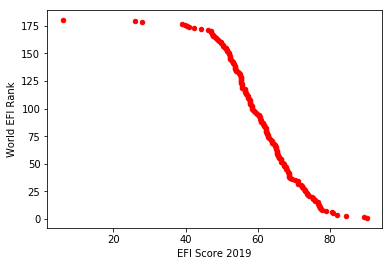

In [13]:
# Since World Ranking is based on EFI Score, these should be deeply correlated
data.plot.scatter(x="EFI Score 2019", y="World EFI Rank", c="red")


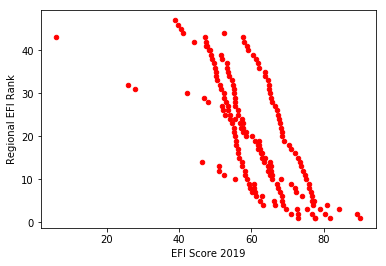

In [14]:
# Same here 
# you can even see the lines for each region
data.plot.scatter(x="EFI Score 2019", y="Regional EFI Rank", c="red")


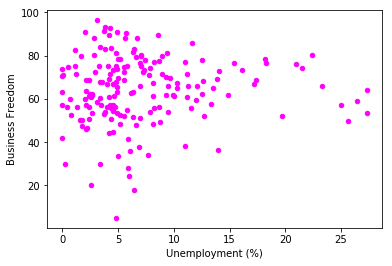

In [15]:
data.plot.scatter(x="Unemployment (%)", y="Business Freedom", c="magenta")


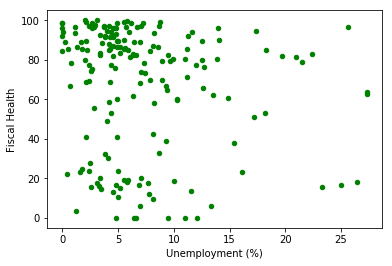

In [16]:
data.plot.scatter(x="Unemployment (%)", y="Fiscal Health", c="green")


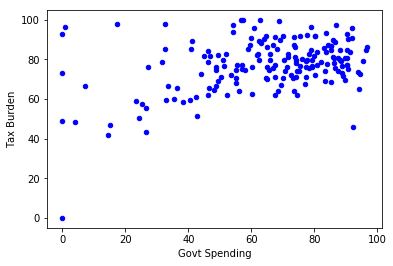

In [17]:
data.plot.scatter(x="Govt Spending", y="Tax Burden", c="blue")


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


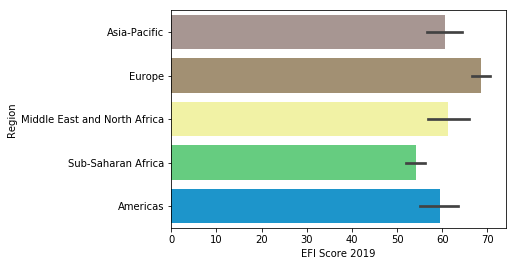

In [18]:
sns.barplot(y='Region', x='EFI Score 2019', palette='terrain_r', data=data)

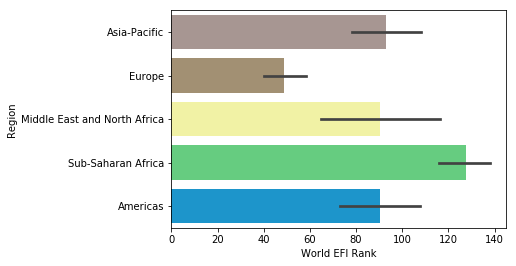

In [19]:
# Higher Rank means lower EFI Score 
sns.barplot(y='Region', x='World EFI Rank', palette='terrain_r', data=data)

In [20]:
df_2018 = pd.read_excel('index2018_data.xls', encoding = 'latin-1')
df_2018.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.6,8.54,4.384,99.569,8.271
1,2,Albania,Albania,Europe,65.0,32.0,64.5,54.1,25.4,39.9,...,Albania,2.885,34.155,2.6,2.0478,11840.2,16.333,1.275,1124.35,71.536
2,3,Algeria,Algeria,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,...,Algeria,40.762,612.513,3.7,3.5802,15026.5,11.222,6.398,1546,20.356
3,4,Angola,Angola,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,...,Angola,27.360,187.261,3,3.9560,6844.43,6.579,32.378,14363.6,71.883
4,5,Argentina,Argentina,Americas,144.0,26.0,52.3,40.8,44.5,32.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.5,6.557,58.400,5745.18,51.269


In [21]:
# WEBNAME is the same as Country Name with slight differences; so is Country
# CountryID is basically like index
df_2018 = df_2018.drop(["WEBNAME", "CountryID", "Country Name"], axis = 1)


In [22]:
df_2018.rename(columns={ 
    "2019 Score": "EFI Score 2019",
    "World Rank": "World EFI Rank",
    "Region Rank": "Regional EFI Rank",
    "Gov\'t Spending": "Govt Spending",
    "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP",
    "Investment Freedom ": "Investment Freedom"
}, inplace=True)

In [23]:
df_2018.replace({ 
    '$15.1 (2015 nominal)': 15.1,
    '$6.1 (2014 nominal)': 6.1,
    '$21.0 (nominal)': 21.0,
    '$5.9 (2015 nominal)': 5.9,
    '$9,600 (estimated)': 9600,
    '249.0 (2014 net)': 249.0,
    '1.0 (2014)': 1.0,
    '1.2 (2014)': 1.2,
    '2.4 (2015)': 2.4
    }, inplace=True
)

In [24]:
df_2018['GDP (Billions, PPP)'] = df_2018['GDP (Billions, PPP)'].fillna(0).astype(float)
df_2018['GDP per Capita (PPP)'] = df_2018['GDP per Capita (PPP)'].fillna(0).astype(float)
df_2018['FDI Inflow (Millions)'] = df_2018['FDI Inflow (Millions)'].fillna(0).astype(float)
df_2018['Property Rights'] = df_2018['Property Rights'].fillna(0).astype(float)
df_2018['Judical Effectiveness'] = df_2018['Judical Effectiveness'].fillna(0).astype(float)
df_2018['Government Integrity'] = df_2018['Government Integrity'].fillna(0).astype(float)
df_2018['Tax Burden'] = df_2018['Tax Burden'].fillna(0).astype(float)
df_2018['Govt Spending'] = df_2018['Govt Spending'].fillna(0).astype(float)
df_2018['Fiscal Health'] = df_2018['Fiscal Health'].fillna(0).astype(float)
df_2018['Business Freedom'] = df_2018['Business Freedom'].fillna(0).astype(float)
df_2018['Labor Freedom'] = df_2018['Labor Freedom'].fillna(0).astype(float)
df_2018['Monetary Freedom'] = df_2018['Monetary Freedom'].fillna(0).astype(float)
df_2018['Trade Freedom'] = df_2018['Trade Freedom'].fillna(0).astype(float)
df_2018['Investment Freedom'] = df_2018['Investment Freedom'].fillna(0).astype(float)
df_2018['Financial Freedom'] = df_2018['Financial Freedom'].fillna(0).astype(float)
df_2018['Tariff Rate (%)'] = df_2018['Tariff Rate (%)'].fillna(0).astype(float)
df_2018['Income Tax Rate (%)'] = df_2018['Income Tax Rate (%)'].fillna(0).astype(float)
df_2018['Corporate Tax Rate (%)'] = df_2018['Corporate Tax Rate (%)'].fillna(0).astype(float)
df_2018['Tax Burden % of GDP'] = df_2018['Tax Burden % of GDP'].fillna(0).astype(float)
df_2018['Govt Expenditure % of GDP'] = df_2018['Govt Expenditure % of GDP'].fillna(0).astype(float)
df_2018['Population (Millions)'] = df_2018['Population (Millions)'].fillna(0).astype(float)
df_2018['GDP Growth Rate (%)'] = df_2018['GDP Growth Rate (%)'].fillna(0).astype(float)
df_2018['5 Year GDP Growth Rate (%)'] = df_2018['5 Year GDP Growth Rate (%)'].fillna(0).astype(float)
df_2018['Unemployment (%)'] = df_2018['Unemployment (%)'].fillna(0).astype(float)
df_2018['Inflation (%)'] = df_2018['Inflation (%)'].fillna(0).astype(float)
df_2018['Public Debt (% of GDP)'] = df_2018['Public Debt (% of GDP)'].fillna(0).astype(float)
# df_2018['Unemployment (%)'].unique()

In [25]:
df_2018.head()

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,Albania,2.885,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,Algeria,40.762,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,Angola,27.360,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269


In [26]:
conditions = [
    (df_2018["2018 Score"] >= 80.0),
    (df_2018["2018 Score"] < 80.0) & (df_2018["2018 Score"] >= 70.0),
    (df_2018["2018 Score"] < 70.0) & (df_2018["2018 Score"] >= 60.0),
    (df_2018["2018 Score"] < 60.0) & (df_2018["2018 Score"] >= 50.0),
    (df_2018["2018 Score"] < 49.9)
]

choices = ["Free", "Mostly Free", "Moderately Free", "Mostly Unfree", "Repressed"]
df_2018["Freedom Level"] = np.select(conditions, choices, default="None")
df_2018.head()

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom Level
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,33.400,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271,Mostly Unfree
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,2.885,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536,Moderately Free
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,40.762,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356,Repressed
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,27.360,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883,Repressed
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,43.600,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269,Mostly Unfree


In [27]:
conditions = [
    (df_2018["2018 Score"] >= 50.0),
    (df_2018["2018 Score"] < 50.0)
]

# Some freedom vs Repressed
choices = ["1", "0"]
df_2018["Binary Freedom"] = np.select(conditions, choices, default="None")
df_2018

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom Level,Binary Freedom
0,Asia-Pacific,154.0,38.0,51.3,17.900000,28.200000,26.2,91.8,79.300000,98.300000,...,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271,Mostly Unfree,1
1,Europe,65.0,32.0,64.5,54.100000,25.400000,39.9,85.1,72.700000,67.500000,...,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536,Moderately Free,1
2,Middle East / North Africa,172.0,14.0,44.7,27.800000,35.200000,29.0,74.0,45.900000,19.200000,...,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356,Repressed,0
3,Sub-Saharan Africa,164.0,40.0,48.6,36.000000,25.400000,18.9,82.4,69.100000,54.800000,...,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883,Repressed,0
4,Americas,144.0,26.0,52.3,40.800000,44.500000,32.6,65.7,55.600000,52.600000,...,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269,Mostly Unfree,1
5,Europe,44.0,20.0,68.7,55.300000,47.400000,40.5,84.7,80.000000,67.200000,...,25.783,3.0,3.4528,8620.975,16.759,-1.406,338.033697,51.813,Moderately Free,1
6,Asia-Pacific,5.0,4.0,80.9,78.700000,93.400000,77.4,63.0,61.200000,84.300000,...,1187.321,2.5,2.6792,48899.123,5.738,1.301,48190.245389,41.091,Free,1
7,Europe,32.0,17.0,71.8,83.500000,80.900000,73.5,49.9,19.400000,81.100000,...,417.226,0.9,0.7920,48004.660,6.109,0.973,-6088.525334,83.871,Mostly Free,1
8,Asia-Pacific,67.0,14.0,64.3,53.600000,36.800000,39.9,87.5,59.400000,95.500000,...,165.533,1.1,1.6188,17438.590,5.073,12.400,4500.000000,37.673,Moderately Free,1
9,Americas,74.0,15.0,63.3,46.500000,53.500000,50.9,96.5,82.900000,59.000000,...,9.043,0.5,0.1832,24555.152,15.313,0.402,521.854452,66.917,Moderately Free,1


In [28]:
df_2018 = df_2018.dropna(subset=['2018 Score'])

## Predict 2019 Score Values Using Classifed 2018 Data
## Predict 2019 Classifiers Using Classified 2018 Data 
## Visualize Clustering on Unlabeled 2019 Data



In [29]:
df_2018.columns.unique()

Index(['Region', 'World EFI Rank', 'Regional EFI Rank', '2018 Score',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Freedom Level', 'Binary Freedom'],
      dtype='object')

In [30]:
feature_cols = ['World EFI Rank', 'Regional EFI Rank',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)',]

In [31]:
X = df_2018[feature_cols]
y = df_2018['Binary Freedom']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_test.value_counts()



1    38
0     7
Name: Binary Freedom, dtype: int64

In [32]:

# Validating that this is one fourth of total data
y_test.count() / df_2018['2018 Score'].count()


0.25

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(y_pred)


['1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1'
 '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1']


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print(y_test.values.T)

['1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1']


In [41]:

print("Accuracy of 2018 label predictions: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
      
      

Accuracy of 2018 label predictions: 97.78%


In [42]:
matrix = metrics.confusion_matrix(y_test, y_pred)

In [43]:
def cmat_(cm, labels=None):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    plt.show()

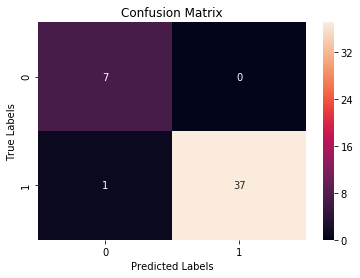

In [44]:
cmat_(matrix)

### What we have:
    - `data` --> 2019 Dataset (no labels)
    - `df_2018` --> 2018 Dataset (labels included)

### What we want:
- X_train, X_test, y_train, y_test
    - X_train: 2018 data with labels removed
    - X_test: 2019 data
    - y_train: 2018 labels
    - y_test: DOESN'T EXIST
    
### How to get from have to want:
- Train on **all** of `df_2018` data now that you know that you can get *very accurate* prediction accuracies.
- Test on either **all** or **some** of `data` for 2019 since it doesn't have labels.

# 🌟 Prediction Process!

In [46]:
X_train_comb = df_2018[feature_cols] # get the all features from 2018
X_test_comb = data[feature_cols] # X_test is all features from 2019

y_train_comb = df_2018['Binary Freedom']

X_train 

,World EFI Rank,Regional EFI Rank,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Govt Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
81,30.0,8.0,86.0,73.2,79.2,67.4,54.1,49.3,81.7,79.2,...,39.127169,126.901,5237.790,0.5,1.2068,41274.605,3.136,-0.113,11388.407710,239.184
19,91.0,38.0,39.5,43.7,28.4,83.5,41.5,94.4,49.3,59.6,...,44.146667,3.854,42.234,2.8,1.5972,10957.542,25.761,-1.100,285.243452,44.368
140,137.0,26.0,38.0,28.2,39.4,82.0,69.5,45.8,65.9,42.7,...,31.873333,0.208,0.638,4.0,4.1768,3071.841,13.598,5.433,22.150000,92.775
107,134.0,24.0,23.9,17.6,28.9,75.9,72.8,71.8,64.2,59.2,...,30.104333,3.794,16.418,1.9,3.9812,4327.955,11.657,1.472,271.645740,99.607
149,114.0,26.0,49.4,57.3,36.8,65.5,35.6,99.8,68.9,72.4,...,46.347667,0.601,1.185,3.3,2.9408,1972.582,31.426,0.437,24.529872,9.043
16,120.0,17.0,35.5,31.3,30.2,67.4,85.6,49.7,60.7,49.9,...,21.873667,11.128,23.585,5.2,4.8972,2119.434,1.005,-0.809,160.585150,50.300
51,175.0,45.0,29.8,17.6,26.2,69.6,61.0,19.1,45.6,29.8,...,36.058667,0.821,31.720,-12.2,-2.7532,38639.066,7.334,1.400,53.962173,21.655
174,18.0,2.0,79.3,76.9,71.9,65.1,56.5,54.8,82.7,91.4,...,38.058865,323.298,18569.100,2.4,2.0966,57436.409,4.906,1.275,391104.000000,107.351
124,93.0,8.0,59.5,57.4,51.5,98.5,25.0,17.7,76.3,55.2,...,49.998667,3.957,184.788,4.1,4.6962,46697.960,17.522,1.100,142.000000,34.274
40,92.0,39.0,65.9,56.5,40.5,66.0,32.5,67.2,58.9,43.0,...,47.417667,4.170,95.063,1.6,0.1654,22795.312,13.476,-1.125,1744.658846,84.379


In [47]:
pred_2019 = lr.predict(X_test_comb)
pred_2019

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0'],
 

## MAIN GOAL: 
- Import labels.
- Get y-test and compare to y_pred above using confusion matrix.

- Do some clustering to potentially match results of logistic results. 

## STRETCH GOAL:
- Import labels.
- Aggregate 2018 and 2019 data with new labels.
- Go back to 🌟 **Prediction Process!** and retrain/retest now using 2019 data. (If data is aggregated, use `train_test_split()`. 
- Compare accuracy using confusion matrix and other relevant tactics. 

# Import 2019 Labels to get y_test

In [48]:
conditions = [
    (data["EFI Score 2019"] >= 50.0),
    (data["EFI Score 2019"] < 50.0)
]

# Some freedom vs Repressed
choices = ["1", "0"]
data["Binary Freedom"] = np.select(conditions, choices, default="None")
data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Region,World EFI Rank,Regional EFI Rank,EFI Score 2019,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Binary Freedom
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,35.5,696.0,2.5,2.9,1958.0,8.8,5.0,539.0,7.3,1
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,2.9,360.0,3.9,2.5,12507.0,13.9,2.0,11191.0,71.2,1
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,41.5,6329.0,2.0,3.1,15237.0,10.0,5.6,12030.0,25.8,0
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,28.2,1903.0,0.7,2.9,6753.0,8.2,31.7,22545.0,65.3,1
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,44.1,9202.0,2.9,0.7,20876.0,8.7,25.7,118570.0,52.6,1
5,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,...,3.0,283.0,7.5,3.6,9456.0,18.2,0.9,2457.0,53.5,1
6,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,24.8,12465.0,2.3,2.4,50334.0,5.6,2.0,463680.0,41.6,1
7,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,...,8.8,4396.0,2.9,1.3,49869.0,5.5,2.2,96296.0,78.8,1
8,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,...,9.8,1718.0,0.1,1.2,17492.0,5.0,13.0,28670.0,54.7,1
9,Americas,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,...,0.4,116.0,1.3,-0.7,31139.0,12.6,1.4,9277.0,57.2,1


In [49]:
y_test_comb = data['Binary Freedom']


In [66]:
print("Prediction values:\n", pred_2019)
# unique, counts = np.unique(pred_2019, return_counts=True)
# print(np.asarray((unique, counts)).T)

Prediction values:
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0']


In [67]:
print("Test values:\n", y_test_comb.values.T)

Test values:
 ['1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '0' '1' '1' '0' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0']


In [73]:

print("Accuracy of 2019 label predictions: {:.2f}%".format(metrics.accuracy_score(y_test_comb, pred_2019)*100))
      

Accuracy of 2019 label predictions: 95.56%


In [71]:
new_matrix = metrics.confusion_matrix(y_test_comb, pred_2019)

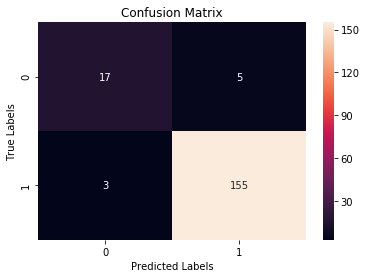

In [72]:
cmat_(new_matrix)

In [87]:
data.index[0]

0

In [79]:
kdata2019 = data.drop(["Region", "Country"], axis = 1)

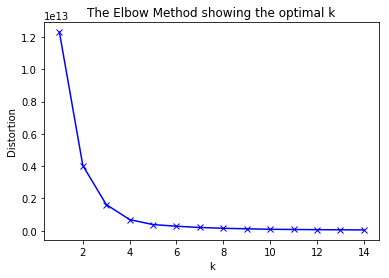

In [82]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(kdata2019) # 2019 data
    sum_of_squared_distances.append(km.inertia_)
    

# Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Seems like we've got two good clusters here

In [84]:
# STEP 1: Instantiate our model with best guess as to n_clusters.
kmeans_model = KMeans(n_clusters=2)

# STEP 2: Fit our data to our model.
kmeans_model.fit(kdata2019) # unscaled data

# STEP 3: Check our model label types.
targets_pred = kmeans_model.labels_

# STEP 4: Run some predictions!
kmeans_model.predict([[13260, 1195, 4220, 6400, 500, 1790]]) # test point w/ true label 0

# STEP 5 (optional): Check the Cluster Centers.
kmeans_model.cluster_centers_

ValueError: Incorrect number of features. Got 6 features, expected 30